In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [64]:
train_data = pd.read_csv("./train.csv")
test_data = pd. read_csv("./test.csv")


In [65]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [66]:
missing_in_train = sum([True for idx,row in train_data.iterrows() if any(row.isnull())])
missing_in_test = sum([True for idx,row in test_data.iterrows() if any(row.isnull())])

f"There are {missing_in_train} missing rows in train and {missing_in_test} missing rows in test"

'There are 2087 missing rows in train and 996 missing rows in test'

In [67]:
def make_frame_ready(source_frame: pd.DataFrame) -> pd.DataFrame:
    

    #make new column group from the passengerId
    source_frame["Group"] = source_frame["PassengerId"].apply(lambda x: x.split("_")[0])

    #make new column family from the name of the passenger
    source_frame["Family"] = source_frame["Name"].apply(lambda x: str(x).split(" ")[-1])


    #impute missing family from group
    source_frame["Family"].isna = source_frame.groupby("Group")["Family"].agg(lambda x: x.value_counts().index[0])

    #TODO impute missing cabins from families

    #split cabin infor into three parts
    source_frame[["Deck", "Num", "shipSide"]] = source_frame["Cabin"].str.split("/", expand=True)
    source_frame["Num"] = source_frame["Num"].astype(np.float64)

    #Put cabin number into bins
    source_frame["NumBin"] = pd.cut(source_frame["Num"], bins=12)

    #create age bins
    source_frame["AgeBin"] = pd.cut(source_frame["Age"], bins=12)

    #set spending for cryosleepers
    source_frame.loc[source_frame["CryoSleep"] == True ,["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0.0

    # set spending of all kids to zero
    source_frame.loc[source_frame["Age"] <= 12, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0.0

    #create totalSpending column
    source_frame["totalSpent"] = source_frame[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

    #set age of all people not spending to average age for people 12 and under
    source_frame["Age"] = np.where((source_frame.CryoSleep == False) & (
    source_frame.Age.isna()) & (source_frame.totalSpent == 0), 5, source_frame.Age)
    
    #impute VIP status by spending   
    source_frame.loc[(source_frame.VIP.isnull()) & (source_frame.totalSpent > 3500), "VIP"] = True
    source_frame["VIP"].fillna(False, inplace=True)


    return source_frame

In [68]:
train_data = make_frame_ready(train_data)

In [69]:
test_data = make_frame_ready(test_data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

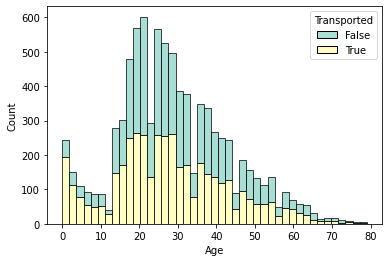

In [78]:
sns.histplot(data=train_data, x="Age", hue="Transported", multiple="stack", palette="Set3")

In [70]:
missing_in_train = sum([True for idx,row in train_data.iterrows() if any(row.isnull())])
missing_in_test = sum([True for idx,row in test_data.iterrows() if any(row.isnull())])

f"There are {missing_in_train} missing rows in train and {missing_in_test} missing rows in test"

'There are 1584 missing rows in train and 761 missing rows in test'

In [71]:
train_data["VIP"].isna().sum()

0

[Text(0, 0, '8476'), Text(0, 0, '217')]

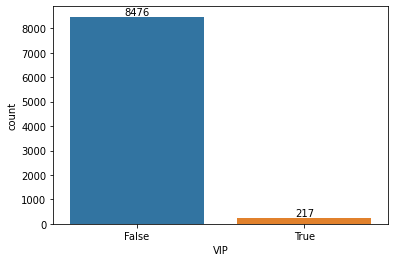

In [72]:
ax = sns.countplot(data=train_data, x="VIP")

ax.bar_label(ax.containers[0])

In [73]:
sum([True for idx,row in train_data.iterrows() if any(row.isnull())])

1584